






<h2 id='part1'>A Look at the Data</h2>

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_calendar = pd.read_csv('./airbnb_seattle/calendar.csv')
df_listings = pd.read_csv('./airbnb_seattle/listings.csv')
df_reviews = pd.read_csv('./airbnb_seattle/reviews.csv')
pd.set_option('display.max_columns', None)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
95,241032,2016-04-08,t,$85.00
96,241032,2016-04-09,t,$85.00
97,241032,2016-04-10,t,$85.00
98,241032,2016-04-11,t,$85.00


In [ ]:
df_calendar.head()

In [22]:
df_reviews.head()

In [209]:
df_listings.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,review_cnt,price_n
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,207.0,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,43.0,170.931271
2,3308979,https://www.airbnb.com/roo


**1.** Provide the number of rows and columns in this dataset.

In [251]:
# explore how many rows and columns in listings

df_listings.shape  # it has 3818 rows and 92 columns

(3818, 94)

#### Analyze the data


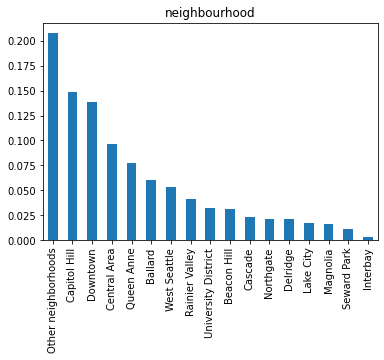

In [252]:
# neighbourhood 

measure_vals = df_listings.neighbourhood_group_cleansed.value_counts()
(measure_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("neighbourhood");

Capital hill and downtown has the most rooms available

Take a look at this other neighbourhoods

In [261]:
df_listings[df_listings['neighbourhood_group_cleansed']=='Other neighborhoods']['neighbourhood_cleansed'].value_counts()

Wallingford               167
Fremont                   158
Greenwood                  89
Phinney Ridge              73
Ravenna                    67
Green Lake                 54
Roosevelt                  30
Bryant                     29
Crown Hill                 21
Wedgwood                   18
Broadview                  17
North Beach/Blue Ridge     14
Bitter Lake                13
Laurelhurst                10
Windermere                 10
Georgetown                  8
View Ridge                  7
Industrial District         6
South Park                  3
Name: neighbourhood_cleansed, dtype: int64

In [268]:
#It worth to take out some neighbourhood which has quite a lot room for rent out of others

df_listings.loc[df_listings['neighbourhood_cleansed']=='Wallingford', 'neighbourhood_group_cleansed'] = 'Wallingford'
df_listings.loc[df_listings['neighbourhood_cleansed']=='Fremont', 'neighbourhood_group_cleansed'] = 'Fremont'
df_listings.loc[df_listings['neighbourhood_cleansed']=='Greenwood', 'neighbourhood_group_cleansed'] = 'Greenwood'
df_listings.loc[df_listings['neighbourhood_cleansed']=='Phinney Ridge', 'neighbourhood_group_cleansed'] = 'Phinney Ridge'
df_listings.loc[df_listings['neighbourhood_cleansed']=='Ravenna', 'neighbourhood_group_cleansed'] = 'Ravenna'
df_listings.loc[df_listings['neighbourhood_cleansed']=='Green Lake', 'neighbourhood_group_cleansed'] = 'Green Lake'

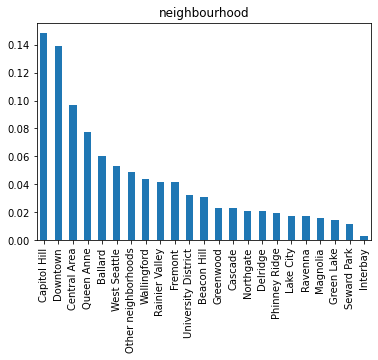

In [269]:
# neighbourhood 

measure_vals = df_listings.neighbourhood_group_cleansed.value_counts()
(measure_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("neighbourhood");

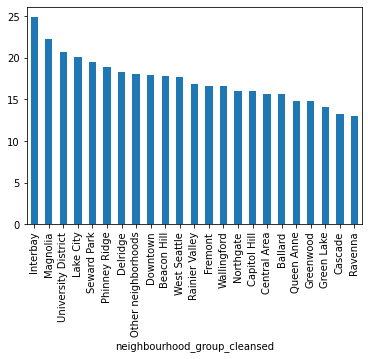

In [272]:
# It is easier to find accomendations in Interbay, magnolia and lake city

df_listings.groupby('neighbourhood_group_cleansed')['availability_30'].mean().sort_values(ascending=False).plot(kind="bar");

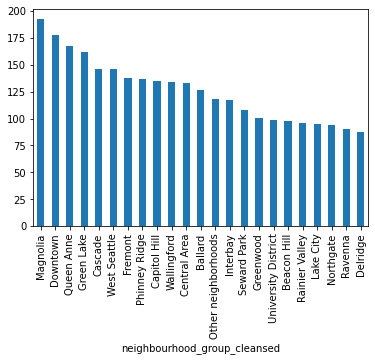

In [270]:
# neighbourhood --Magnolia ,downtown, queen anne,and green lake is more expensive than the other area

df_listings.groupby('neighbourhood_group_cleansed')['price_n'].mean().sort_values(ascending=False).plot(kind="bar");

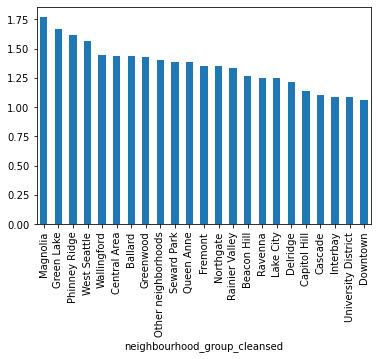

In [274]:
# neighbourhood -- downtown has the higher price and least amout of rooms, the cost is higher

df_listings.groupby('neighbourhood_group_cleansed')['bedrooms'].mean().sort_values(ascending=False).plot(kind="bar");

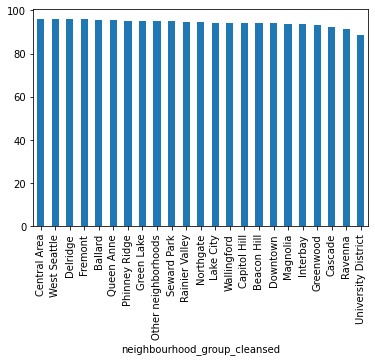

In [277]:
# neighbourhood -- university District seem to have worse review than others

df_listings.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False).plot(kind="bar");

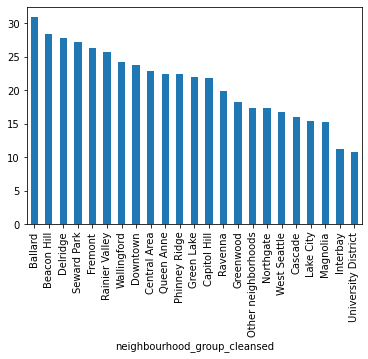

In [278]:
# neighbourhood -- university District seem to have worse review than others and least people has reviewed

df_listings.groupby('neighbourhood_group_cleansed')['number_of_reviews'].mean().sort_values(ascending=False).plot(kind="bar");

To Analyze the vibe of each neighbourhood, can count the most frequent words in description which is not a common word

In [254]:
df_processed.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_years,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,96.000000,100.000000,3.0,3.0,4,1.0,1.0,1.0,85.0,0.0,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,98.000000,100.000000,6.0,6.0,4,1.0,1.0,1.0,150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
2,67.000000,100.000000,2.0,2.0,11,4.5,5.0,7.0,975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,94.886798,99.967159,1.0,1.0,3,1.0,0.0,2.0,100.0,0.0,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,100.000000,99.967159,2.0,2.0,6,2.0,3.0,3.0,450.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0.890000,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


some pre-cleaning specific to this case

In [219]:
df_processed.dropna(subset=['host_since'],axis=0,inplace=True)
df_processed['host_years']=2016-df_processed['host_since'].str[:4].astype('int')



### Data Cleaning




In [ ]:
target='price'
fill_zero_columns=['cleaning_fee']
num_cols_dirty=['host_response_rate','host_acceptance_rate','price','weekly_price','cleaning_fee','extra_people']
col_to_drop=[i for i in df_processed.columns if ('_id' in i) | ('_url' in i) | ('name' in i)]
col_to_drop=col_to_drop+['first_review','last_review','calendar_last_scraped','last_scraped','review_cnt','price_n',
                     'calendar_updated','host_since','host_name','host_location','host_about','summary','space','description',
                    'neighborhood_overview','notes','transit','street','neighbourhood','neighbourhood_cleansed','city','zipcode',
                    'market','smart_location','country_code','country','latitude','longitude','is_location_exact','host_neighbourhood'
                    'state','host_verifications','amenities','weekly_price']

In [233]:
def clean_data(df,col_to_drop,target,num_cols_dirty,fill_zero_columns,):
    # Drop rows with missing target values
    df = df.dropna(subset=[target], axis=0)
    y = df[target]    
    
    #drop columns which have single value
    unique_columns=list(df.columns[df.nunique()==1])

    
    #drop columns which have more than half values missing
    null_columns=list(df_listings.columns[df_listings.isnull().mean() > 0.5])
    
    col_to_drop=col_to_drop+unique_columns+null_columns
    
    for i in num_cols_dirty:
        df[i]=df[i].replace('[\$,%]', '', regex=True).astype('float')

    #for numeric columns which shouldn't be represented by mean
    df[fill_zero_columns].fillna(0,inplace=True)
    
    #Drop columns that from preview of the data
    df = df.drop([col_to_drop], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    
    X = df.drop[target]
    return X, y, df


In [ ]:
    
#Use the function to create X and y
X, y, df = clean_data(df)    



**3.** Which columns have the most correlation with price

In [242]:
C_mat = df_processed.corr()

print("top 10 features with positive correlation with label:")
print(C_mat['price'].sort_values(ascending=False)[:20])

print("top 10 features with negative correlation with label:")
print(C_mat['price'].sort_values(ascending=True)[:10])

top 10 features with positive correlation with label:
price                                      1.000000
accommodates                               0.652647
bedrooms                                   0.627945
beds                                       0.589694
cleaning_fee                               0.576929
bathrooms                                  0.516292
guests_included                            0.393140
cancellation_policy_strict                 0.226932
extra_people                               0.128294
bed_type_Real Bed                          0.126349
neighbourhood_group_cleansed_Downtown      0.117137
host_total_listings_count                  0.093962
host_listings_count                        0.093962
neighbourhood_group_cleansed_Queen Anne    0.093893
property_type_Boat                         0.078436
neighbourhood_group_cleansed_Magnolia      0.070226
review_scores_location                     0.068196
require_guest_profile_picture_t            0.063396
require_gu

#### Correlation

From above, we can tell the number and types of the rooms and beds of the house as well as their neighbour hood has great impact on their price

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_years,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,96.000000,100.000000,3.0,3.0,4,1.0,1.0,1.0,85.0,0.0,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,98.000000,100.000000,6.0,6.0,4,1.0,1.0,1.0,150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
2,67.000000,100.000000,2.0,2.0,11,4.5,5.0,7.0,975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,94.886798,99.967159,1.0,1.0,3,1.0,0.0,2.0,100.0,0.0,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,100.000000,99.967159,2.0,2.0,6,2.0,3.0,3.0,450.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0.890000,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
